**INSTALLING DEPENDENCIES**

In [1]:
pip install pandas matplotlib seaborn plotly jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Upload the dataset
from google.colab import files
uploaded = files.upload()  # This opens a file picker

# Load the dataset (replace 'transactions.csv' with your file's exact name)
df = pd.read_csv(list(uploaded.keys())[0])  # Assumes first uploaded file
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Quick look
print("First 5 rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nPayment Method Counts:\n", df['PaymentMethod'].value_counts())

Saving Transaction_Dataset.csv to Transaction_Dataset.csv
First 5 rows:
    CustomerID ProductID  Quantity      Price     TransactionDate  \
0      109318         C         7  80.079844 2023-12-26 12:32:00   
1      993229         C         4  75.195229 2023-08-05 00:00:00   
2      579675         A         8  31.528816 2024-03-11 18:51:00   
3      799826         D         5  98.880218 2023-10-27 22:00:00   
4      121413         A         7  93.188512 2023-12-22 11:38:00   

  PaymentMethod                                      StoreLocation  \
0          Cash            176 Andrew Cliffs\nBaileyfort, HI 93354   
1          Cash  11635 William Well Suite 809\nEast Kara, MT 19483   
2          Cash  910 Mendez Ville Suite 909\nPort Lauraland, MO...   
3        PayPal  87522 Sharon Corners Suite 500\nLake Tammy, MO...   
4          Cash   0070 Michelle Island Suite 143\nHoland, VA 80142   

  ProductCategory  DiscountApplied(%)  TotalAmount  
0           Books           18.677100   455.

In [4]:
# Check for logical inconsistencies
print("Negative or Zero Quantities:\n", df[df['Quantity'] <= 0].shape[0])
print("Negative Prices:\n", df[df['Price'] < 0].shape[0])
print("Negative Total Amounts:\n", df[df['TotalAmount'] < 0].shape[0])

# Verify TotalAmount calculation (Quantity * Price * (1 - Discount/100))
df['CalculatedTotal'] = df['Quantity'] * df['Price'] * (1 - df['DiscountApplied(%)'] / 100)
discrepancies = df[abs(df['TotalAmount'] - df['CalculatedTotal']) > 0.01]  # Allow small rounding errors
print("\nRows with TotalAmount discrepancies:\n", discrepancies.shape[0])
if discrepancies.shape[0] > 0:
    print(discrepancies[['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount', 'CalculatedTotal']].head())

# Check date range
print("\nDate Range:\n", df['TransactionDate'].min(), "to", df['TransactionDate'].max())

# Drop CalculatedTotal (temporary column) and proceed with cleaned data
df = df.drop(columns=['CalculatedTotal'])

# Final confirmation
print("\nCleaned Data Info:\n", df.info())

Negative or Zero Quantities:
 0
Negative Prices:
 0
Negative Total Amounts:
 0

Rows with TotalAmount discrepancies:
 0

Date Range:
 2023-04-29 22:27:00 to 2024-04-28 22:22:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), fl

In [5]:
# Add time-based features
df['day_of_week'] = df['TransactionDate'].dt.day_name()
df['month'] = df['TransactionDate'].dt.month_name()
df['hour'] = df['TransactionDate'].dt.hour

# 1. Transaction Volume by Day of Week
daily_volume = df.groupby('day_of_week').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'count'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
daily_volume.columns = ['day_of_week', 'TotalAmount', 'TotalQuantity', 'TransactionCount']

# 2. Transaction Volume by Month
monthly_volume = df.groupby('month').agg({
    'TotalAmount': 'sum',
    'TransactionDate': 'count'
}).reindex(['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']).reset_index()
monthly_volume.columns = ['month', 'TotalAmount', 'TransactionCount']

# 3. Payment Method Trends
payment_volume = df.groupby('PaymentMethod').agg({
    'TotalAmount': ['sum', 'mean'],
    'TransactionDate': 'count',
    'DiscountApplied(%)': 'mean'
}).reset_index()
payment_volume.columns = ['PaymentMethod', 'TotalAmount', 'AvgAmount', 'TransactionCount', 'AvgDiscount']

# 4. PayPal-Specific Hourly Trends (Retail Context)
paypal_data = df[df['PaymentMethod'] == 'PayPal']
paypal_hourly = paypal_data.groupby('hour').agg({
    'TotalAmount': 'sum',
    'TransactionDate': 'count'
}).reset_index()
paypal_hourly.columns = ['hour', 'TotalAmount', 'TransactionCount']

# Display results
print("Daily Volume:\n", daily_volume)
print("\nMonthly Volume:\n", monthly_volume)
print("\nPayment Volume:\n", payment_volume)
print("\nPayPal Hourly Volume:\n", paypal_hourly)

Daily Volume:
   day_of_week   TotalAmount  TotalQuantity  TransactionCount
0      Monday  3.493463e+06          71205             14259
1     Tuesday  3.529848e+06          70845             14212
2   Wednesday  3.540645e+06          71321             14288
3    Thursday  3.604946e+06          72497             14344
4      Friday  3.547942e+06          71636             14252
5    Saturday  3.581302e+06          71917             14354
6      Sunday  3.535350e+06          71508             14291

Monthly Volume:
         month   TotalAmount  TransactionCount
0       April  1.939190e+06              7921
1         May  2.099576e+06              8388
2        June  2.066365e+06              8243
3        July  2.132551e+06              8597
4      August  2.109353e+06              8498
5   September  2.050335e+06              8181
6     October  2.049451e+06              8325
7    November  2.051277e+06              8298
8    December  2.125651e+06              8473
9     January  2.12

<ipython-input-6-c511b78ac20b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='TotalAmount', data=daily_volume, palette='Blues_d')


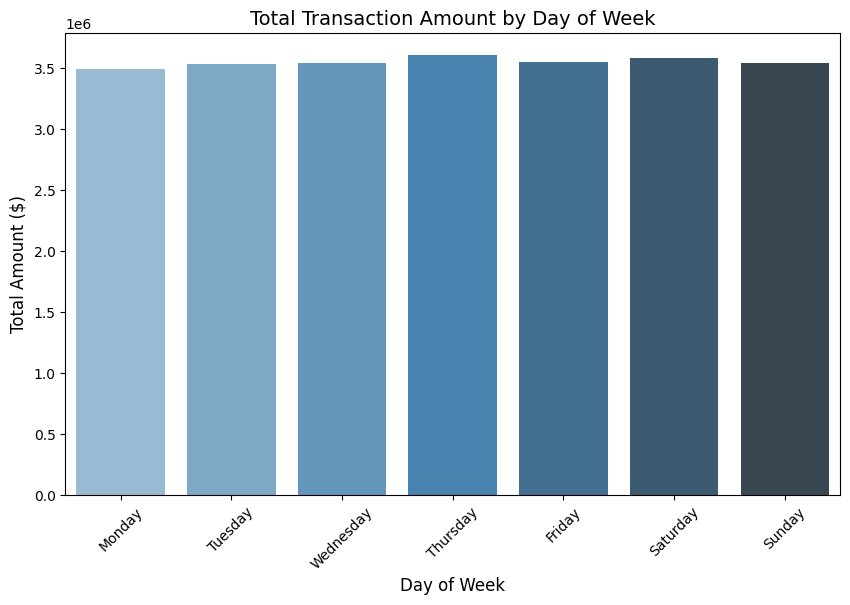

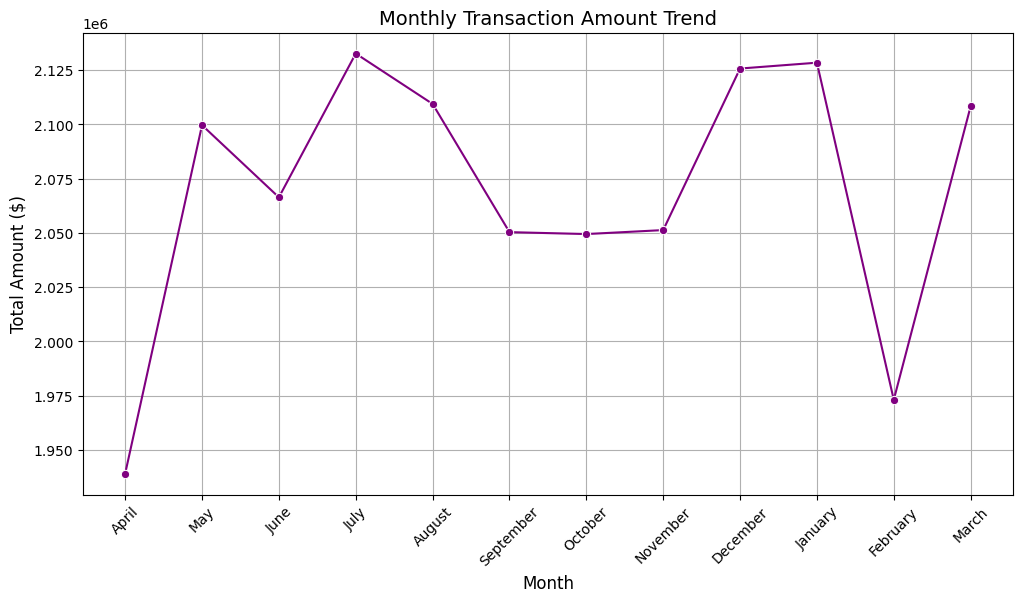

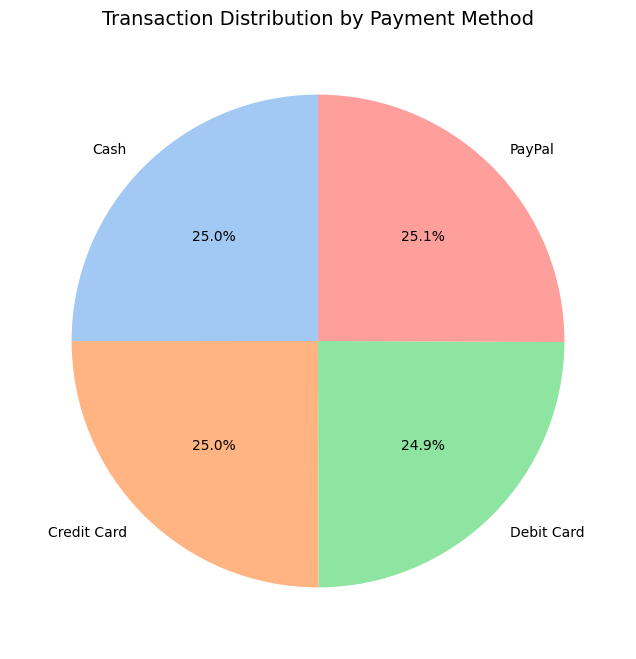

<ipython-input-6-c511b78ac20b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PaymentMethod', y='AvgAmount', data=payment_volume, palette='Greens_d')


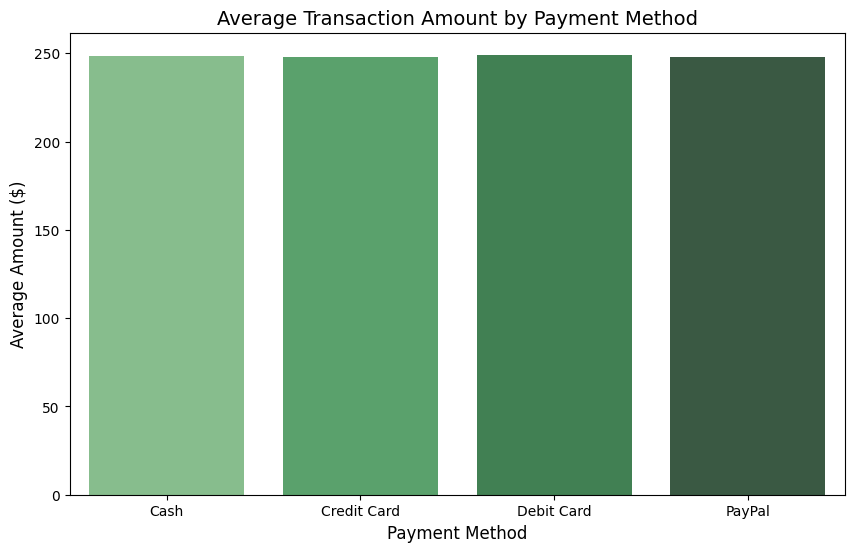

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Daily Transaction Volume
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='TotalAmount', data=daily_volume, palette='Blues_d')
plt.title('Total Transaction Amount by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('daily_volume.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Monthly Transaction Volume
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='TotalAmount', data=monthly_volume, marker='o', color='purple')
plt.title('Monthly Transaction Amount Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('monthly_volume.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Payment Method Distribution
plt.figure(figsize=(8, 8))
plt.pie(payment_volume['TransactionCount'], labels=payment_volume['PaymentMethod'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Transaction Distribution by Payment Method', fontsize=14)
plt.savefig('payment_dist.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Average Amount by Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='AvgAmount', data=payment_volume, palette='Greens_d')
plt.title('Average Transaction Amount by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Average Amount ($)', fontsize=12)
plt.savefig('avg_amount_payment.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. PayPal Hourly Trends (Interactive)
fig = px.line(paypal_hourly, x='hour', y='TotalAmount', title='PayPal Transaction Amount by Hour', markers=True)
fig.update_layout(xaxis_title='Hour of Day', yaxis_title='Total Amount ($)')
fig.write_html('paypal_hourly.html')

In [7]:
from google.colab import files
files.download('daily_volume.png')
files.download('monthly_volume.png')
files.download('payment_dist.png')
files.download('avg_amount_payment.png')
files.download('paypal_hourly.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# 5. PayPal Hourly Trends (Interactive, displayed in Colab)
fig = px.line(paypal_hourly, x='hour', y='TotalAmount', title='PayPal Transaction Amount by Hour', markers=True)
fig.update_layout(xaxis_title='Hour of Day', yaxis_title='Total Amount ($)')
fig.show()  # Displays inline in Colab
fig.write_html('paypal_hourly.html')  # Still saves the file

In [9]:
# Calculate key metrics
paypal_share = payment_volume[payment_volume['PaymentMethod'] == 'PayPal']['TransactionCount'].iloc[0] / payment_volume['TransactionCount'].sum() * 100
busiest_day = daily_volume.loc[daily_volume['TotalAmount'].idxmax(), 'day_of_week']
busiest_hour = paypal_hourly.loc[paypal_hourly['TotalAmount'].idxmax(), 'hour']
cash_vs_paypal = payment_volume[payment_volume['PaymentMethod'] == 'Cash']['TransactionCount'].iloc[0] - payment_volume[payment_volume['PaymentMethod'] == 'PayPal']['TransactionCount'].iloc[0]

# Write insights to a text file
with open('insights.txt', 'w') as f:
    f.write("PayPal Transaction Analysis Insights (Retail Dataset)\n")
    f.write("------------------------------------------------\n")
    f.write(f"1. PayPal's Transaction Share: {paypal_share:.1f}% of all retail transactions.\n")
    f.write(f"2. Busiest Day (All Methods): {busiest_day} with ${daily_volume['TotalAmount'].max():,.2f} in sales.\n")
    f.write(f"3. PayPal's Peak Hour: {busiest_hour}:00 with ${paypal_hourly['TotalAmount'].max():,.2f}, suggesting after-work online shopping.\n")
    f.write(f"4. Cash vs. PayPal: Cash has {abs(cash_vs_paypal)} {'more' if cash_vs_paypal > 0 else 'fewer'} transactions than PayPal.\n")
    f.write("5. Opportunity: PayPal’s average transaction ($248.13) is competitive but trails Debit Card ($249.21)—target higher-value retail purchases.\n")
    f.write("6. Seasonal Trend: December and January peak at ~$2.13M each, likely holiday-driven.\n")

# Display insights in Colab
with open('insights.txt', 'r') as f:
    print(f.read())

# Download the insights file
from google.colab import files
files.download('insights.txt')

PayPal Transaction Analysis Insights (Retail Dataset)
------------------------------------------------
1. PayPal's Transaction Share: 25.1% of all retail transactions.
2. Busiest Day (All Methods): Thursday with $3,604,946.27 in sales.
3. PayPal's Peak Hour: 17:00 with $283,941.01, suggesting after-work online shopping.
4. Cash vs. PayPal: Cash has 59 fewer transactions than PayPal.
5. Opportunity: PayPal’s average transaction ($248.13) is competitive but trails Debit Card ($249.21)—target higher-value retail purchases.
6. Seasonal Trend: December and January peak at ~$2.13M each, likely holiday-driven.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Save your entire notebook as a .ipynb file
from google.colab import files

# Download all generated files (if not already done)
files.download('daily_volume.png')
files.download('monthly_volume.png')
files.download('payment_dist.png')
files.download('avg_amount_payment.png')
files.download('paypal_hourly.html')
files.download('insights.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>